Creating Matches
----------------

One of the capabilities of the library is to create a match between two strategies. Strategies are implemented in
the library as `classes`. A list of all the implemented strategies in the library can be found here: https://axelrod.readthedocs.io/en/stable/reference/strategy_index.html

For now we are going to use two simple strategies to demonstrate how we create a `match`.
A match is often useful when designing new strategies in order to study how they perform against specific opponents.

So for example let us create a 5 turns match between `TitForTat` and `Random`. 

In [1]:
import axelrod as axl

In [2]:
axl.__version__

'4.14.0'

In [3]:
players = [axl.TitForTat(), axl.Random()]
match = axl.Match(players, turns=5, seed=0)
results = match.play()
results

[(C, D), (D, C), (C, C), (C, D), (D, D)]


The first element of each tuple is the action taken by `Tit For Tat`, and the second by `Random`.

`Random` is a stochastic strategy, meaning its actions depend on probability. In this case, we can see that the strategy cooperated only on the third and fourth turns.

The match between the two strategies is seeded, as indicated by the line `seed=0`. This means that no matter how many times you run the match, the results will remain the same. For example, observe the sequence of moves if we instead set `seed=3`.

In [4]:
players = [axl.TitForTat(), axl.Random()]
match = axl.Match(players, turns=5, seed=3)
results = match.play()
results

[(C, C), (C, C), (C, C), (C, C), (C, D)]

Once the game has been played, we can access several post-match metrics. For example, we can examine the score each strategy received at each turn.

In [5]:
scores = match.scores()
scores

[(np.int64(3), np.int64(3)),
 (np.int64(3), np.int64(3)),
 (np.int64(3), np.int64(3)),
 (np.int64(3), np.int64(3)),
 (np.int64(0), np.int64(5))]

Note that these scores correspond to the Prisoner's Dilemma (PD) payoffs as presented in the presentation. Thus, in each turn of the match the strategies play a PD game.

In [6]:
axl.game.Game()

Axelrod game: (R,P,S,T) = (np.int64(3), np.int64(1), np.int64(0), np.int64(5))

The PD is set as the default game in the library. However, it is possible to use a different game.
More information can be found on the online documentation of the Axelrod project, and specifically at [Using and playing different stage games](https://axelrod.readthedocs.io/en/stable/how-to/use_different_stage_games.html#use-different-stage-games).

The final scores of a match, which are the sum of the scores per turn.

In [7]:
match.final_score()

(np.int64(12), np.int64(17))

The average score achieved per turn.

In [8]:
match.final_score_per_turn()

(np.float64(2.4), np.float64(3.4))

The winner.

In [9]:
match.winner()

Random: 0.5

The number of cooperations.

In [10]:
match.cooperation()

(5, 4)

The normalised number of cooperations.

In [11]:
match.normalised_cooperation() 

(1.0, 0.8)

Creating Tournaments
-----------------------

Remember, the library was created to study interactions between strategies in a round-robin tournament, a format where each strategy plays against all others. The strategy with the highest score is declared the winner. In this section, we’ll explore how to easily create a simple Iterated Prisoner's Dilemma (IPD) tournament.

**Reminder:** The full list of all implemented strategies can be found [here](http://axelrod.readthedocs.io/en/latest/reference/all_strategies.html).

We'll now create a list that includes all the strategies submitted to Axelrod's original tournament. All of these strategies have been implemented in Python to the best of the authors' ability, based on their descriptions in the original papers.

You can find a copy of Axelrod's original paper in the `literature` folder.

In [12]:
players = [axl.TitForTat(), axl.FirstByTidemanAndChieruzzi(), axl.FirstByNydegger(), axl.FirstByGrofman(), axl.FirstByShubik(),
           axl.FirstBySteinAndRapoport(), axl.Grudger(), axl.FirstByDavis(), axl.FirstByGraaskamp(), axl.FirstByDowning(),
           axl.FirstByFeld(), axl.FirstByJoss(), axl.FirstByTullock(), axl.FirstByAnonymous(), axl.Random()]

To create a tournament and run a tournament:

In [13]:
tournament = axl.Tournament(players=players, repetitions=5, turns=200)
results = tournament.play()

Analysing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 581.01it/s]


Similar to the matches the tournaments include several result measures. For example the strategies ranked by their average score per turn.

In [14]:
winners = results.ranked_names

In [15]:
winners

['First by Stein and Rapoport: 0.05: (D, D)',
 'First by Grofman',
 'Tit For Tat',
 'First by Shubik',
 'First by Tideman and Chieruzzi: (D, D)',
 'First by Nydegger',
 'Grudger',
 'First by Davis: 10',
 'First by Graaskamp: 0.05',
 'First by Downing',
 'First by Feld: 1.0, 0.5, 200',
 'First by Tullock',
 'First by Joss: 0.9',
 'Random: 0.5',
 'First by Anonymous']

In [16]:
winners[0]

'First by Stein and Rapoport: 0.05: (D, D)'

The scores achieved by each strategy at each repetition.

In [17]:
scores = results.scores
scores

[[7062, 6980, 7066, 7072, 7039],
 [6859, 6918, 6928, 6918, 6937],
 [6919, 6932, 6889, 6902, 6831],
 [7120, 7092, 7079, 7113, 7064],
 [7002, 7061, 7061, 7051, 7001],
 [7075, 7110, 7250, 7230, 7290],
 [6747, 6697, 6807, 6721, 6797],
 [6717, 6670, 6799, 6699, 6683],
 [6470, 6472, 6494, 6678, 6608],
 [6369, 6324, 6047, 6274, 6352],
 [5750, 5722, 5425, 5671, 5693],
 [5109, 4998, 5001, 5164, 4900],
 [4882, 4603, 5259, 5208, 5038],
 [4613, 4497, 5132, 4491, 4406],
 [4673, 4672, 4570, 4382, 4442]]

We can also plot the results.

In [18]:
%matplotlib inline

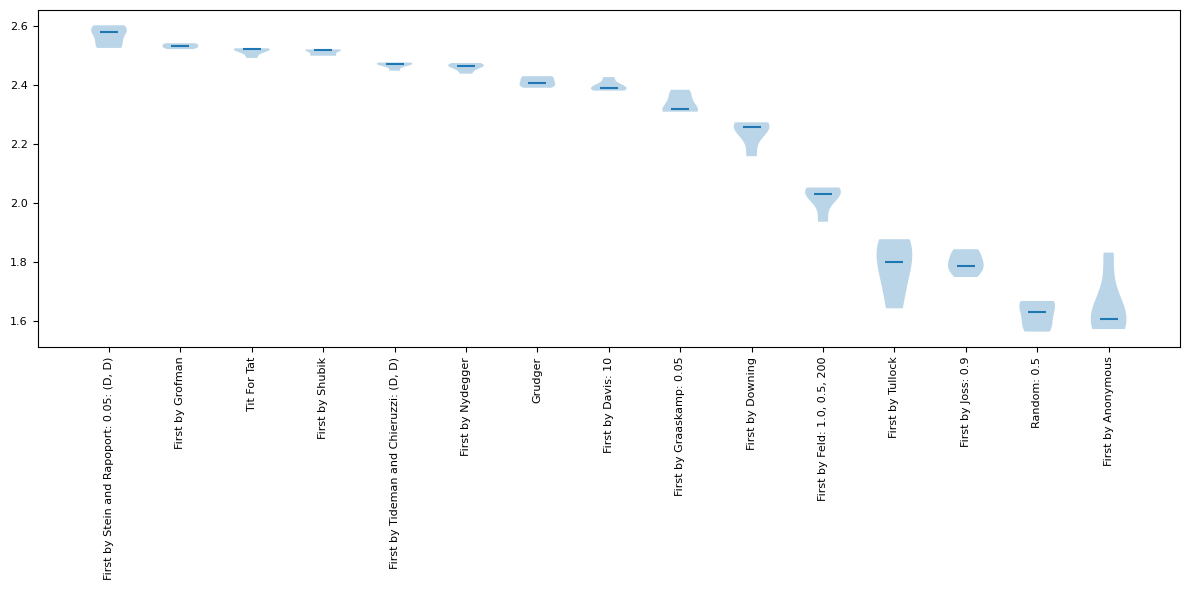

In [19]:
plot = axl.Plot(results)
p = plot.boxplot()

The above plot shows several things.

1. The ranks of the strategies. From left to right the strategies are ordered based on their performance. 

2. The distributions of the average score each strategy achieved.

*Back to the slides*

Probabilistic Ending
---------------------


In Axelrod's second tournament, strategies did not know the number of turns in advance. Instead, there was a probability that the match would end after each turn. We refer to this probability as `prob_end`.

In the literature, this is often described using the *continuation probability*, which is the opposite: the probability that the match will continue for another round.

To create a match with a probabilistic ending, simply pass the argument `prob_end`.

In [20]:
players = [axl.TitForTat(), axl.Random()]

match = axl.Match(players, prob_end=0.1, seed=2)
match.turns

inf

In [21]:
match.play()

[(C, D), (D, D), (D, C), (C, C), (C, C), (C, D)]

In [22]:
players = [axl.TitForTat(), axl.Random()]

match = axl.Match(players, prob_end=0.9, seed=2)
match.play()

[(C, D)]

In [23]:
players = [axl.TitForTat(), axl.FirstByTidemanAndChieruzzi(), axl.FirstByNydegger(), axl.FirstByGrofman(), axl.FirstByShubik(),
           axl.FirstBySteinAndRapoport(), axl.Grudger(), axl.FirstByDavis(), axl.FirstByGraaskamp(), axl.FirstByDowning(),
           axl.FirstByFeld(), axl.FirstByJoss(), axl.FirstByTullock(), axl.FirstByAnonymous(), axl.Random()]

tournament = axl.Tournament(players=players, repetitions=5, prob_end=0.1, seed=0)
results = tournament.play()

Analysing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 619.93it/s]


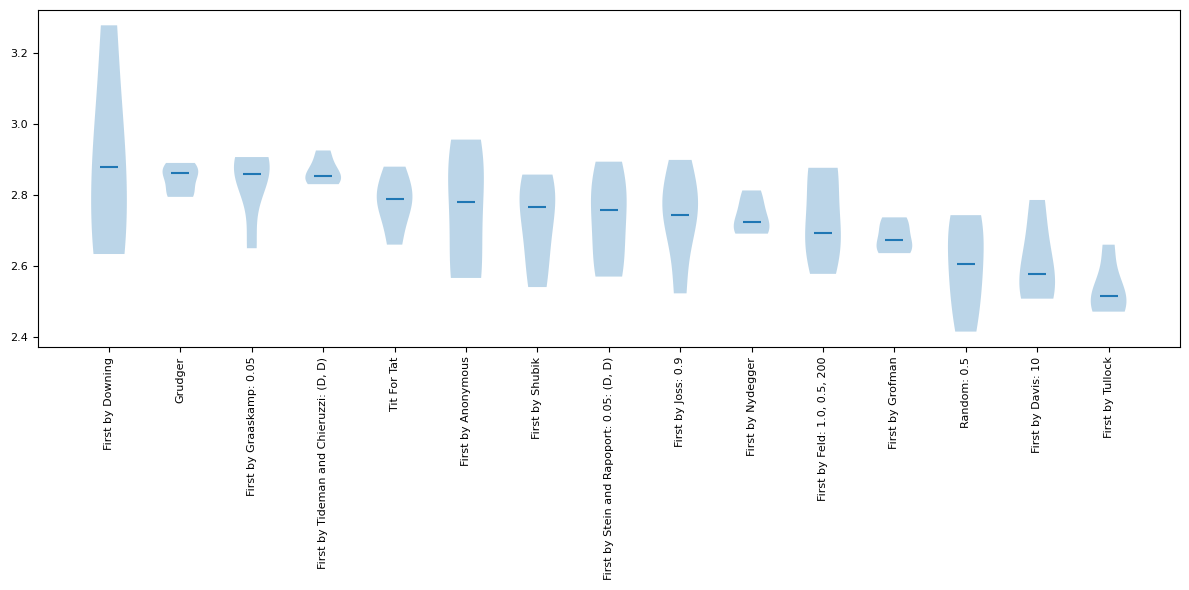

In [24]:
plot = axl.Plot(results)
p = plot.boxplot()

*Back to the slides*

Adding Noise
--------

A common variation in iterated prisoner’s dilemma matches is the introduction of noise. That is, each player's action has a given probability of being flipped (e.g., cooperation becomes defection, and vice versa). Noise can be added to both individual matches and tournaments.

To include noise, specify the input argument `noise`.

In [25]:
players = [axl.TitForTat(), axl.FirstByTidemanAndChieruzzi(), axl.FirstByNydegger(), axl.FirstByGrofman(), axl.FirstByShubik(),
           axl.FirstBySteinAndRapoport(), axl.Grudger(), axl.FirstByDavis(), axl.FirstByGraaskamp(), axl.FirstByDowning(),
           axl.FirstByFeld(), axl.FirstByJoss(), axl.FirstByTullock(), axl.FirstByAnonymous(), axl.Random()]

tournament = axl.Tournament(players=players, repetitions=5, prob_end=0.1, seed=0, noise=0.01)
results = tournament.play()

Analysing: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 633.49it/s]


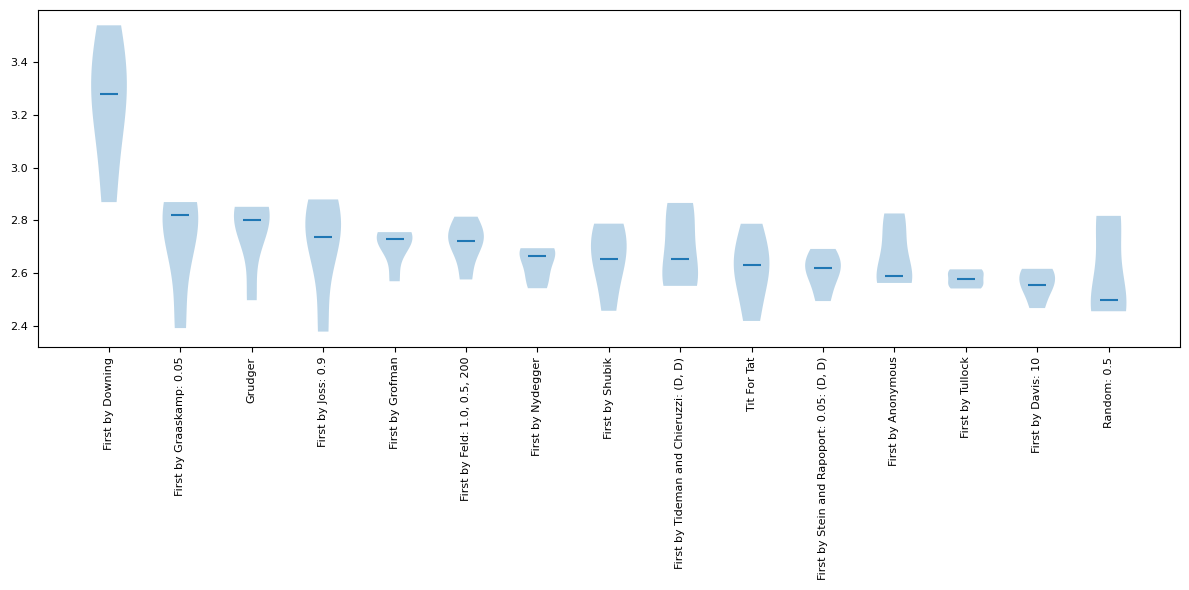

In [26]:
plot = axl.Plot(results)
p = plot.boxplot()

*Back to the slides*